 <center> <h1> <i> <strong style="color:green">PREDICTING WINE QUALITY <i></strong></h1></center>

 <center> <h2>  LINEAR REGRESSION </h2></center>

<h3 style="color:red">RED WINE</h3>

In [42]:
##  Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

#check which version of sklearn are installed
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [43]:
##  Import the sklearn libs
from sklearn.model_selection import train_test_split

#contains utilities for scaling, transforming, and wrangling data.
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

#import some metrics we can use to evaluate our model performance later.
from sklearn.metrics import mean_squared_error, r2_score

<center><h2 style="color:green"><i>Read in the csv files from the url</i></h2></center>

In [44]:
##  read in the red and white wine data files
red_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_url = "http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

df_redwine = pd.read_csv(red_url, sep=';')
df_whitewine = pd.read_csv(white_url, sep=';')

In [45]:
## check the data
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<center><h2 style="color:green"><i>Fit and scale the data</i></h2></center>

In [46]:
# fit the transformer API and scale the data
df_redwine_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_redwine), columns=df_redwine.columns)
df_redwine_scaled.head()


C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [47]:
##  print the print the scatter plots of scaled data (feature v quality)
from pylab import rcParams
import seaborn as sb
rcParams['figure.figsize'] = 10,9
sb.set_style('whitegrid')

In [48]:
##  print the scatter plots of scaled data (feature v quality)
# red_pairplot = sb.pairplot(df_redwine_scaled)
# plt.savefig('red_pairplot.png')

### It appears that there is loose correlation between each features and quality

![some caption](ScatterRawData.png)

<center><h2 style="color:green"><i>Compute pairwise correlation of columns</i></h2></center>
<center><h4 style="color:green"><i>Note that correlations between Quality and other features is not strong</i></h4></center>
<center><h4 style="color:green"><i>We expect that linear regression may not be the best model</i></h4></center>

In [49]:
##The strongest are alcohol (.48) and voatile acidity (-0.39)
## correlation is very small with residual sugar (0.014), pH (-0.06)
df_redwine_corr = df_redwine_scaled.corr()
df_redwine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


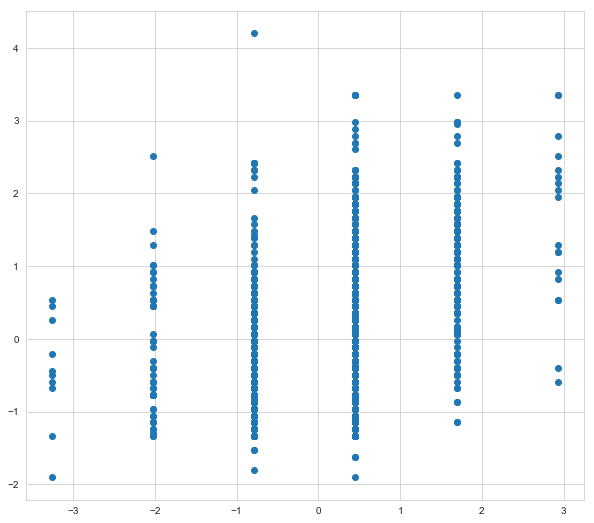

In [50]:
#plt.scatter(df_redwine['quality'], df_redwine['alcohol'], s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
plt.scatter(df_redwine_scaled['quality'], df_redwine_scaled['alcohol'])

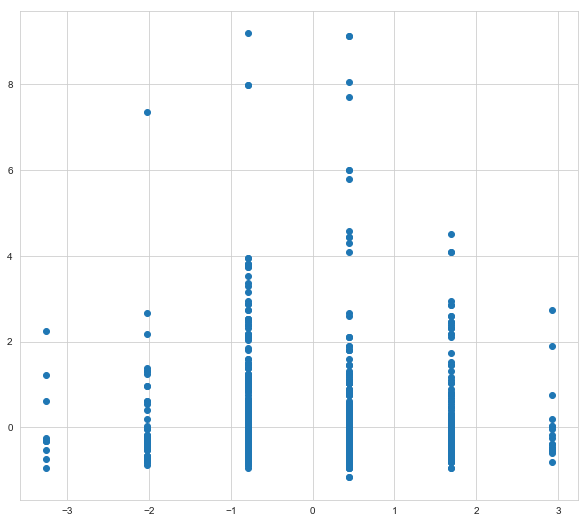

In [51]:
plt.scatter(df_redwine_scaled['quality'], df_redwine_scaled['residual sugar'])

<center><h2 style="color:green"><i>Split the data into training and test datasets</i></h2></center>
<center><h4 style="color:green"><i>20% of the data -> test</i></h4></center>

In [35]:
# Assign X and y values for input to model
y = df_redwine_scaled['quality']
X = df_redwine_scaled.drop('quality', axis=1)

In [36]:
##  split data into train and test sets
##  stratify=y:  A stratified sample is one that ensures that subgroups (strata) of a 
##  given population are each adequately represented within the whole sample population of a research study.
##  test_size=0.2:  set 20% of dataset aside as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [37]:
## fit model with features in X
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
model = LinearRegression()
model.get_params()
model.set_params()

# Setup the parameters and distributions to sample from: param_dist
param_dist = {}
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_dist, random_state=123, n_iter=90, cv=5, verbose=0, n_jobs=-1)
rsearch.fit(X_train, y_train)

C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 1 is smaller than n_iter=90. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
          fit_params=None, iid='warn', n_iter=90, n_jobs=-1,
          param_distributions={}, pre_dispatch='2*n_jobs',
          random_state=123, refit=True, return_train_score='warn',
          scoring=None, verbose=0)

In [38]:
# Predicting the Test set results
y_pred = rsearch.predict(X_test)
y_pred = rsearch.predict(X_test)

score=r2_score(y_test,y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.3026000269960405


In [39]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
r2 = rsearch.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6904586123140851, R2: 0.3026000269960405


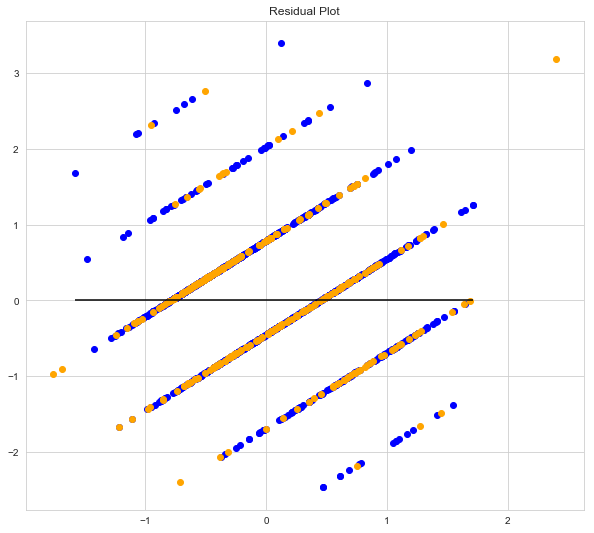

In [41]:
# plot residuals
predictions = rsearch.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show() 

<h3 style="color:green">WHITE WINE</h3>

In [19]:
# fit the transformer API
df_whitewine_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(df_whitewine), columns=df_whitewine.columns)
df_whitewine_scaled.head()

C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ljkop\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [20]:
# plot the pairplot pair grid
# from pylab import rcParams
# import seaborn as sb
# rcParams['figure.figsize'] = 5,4
# sb.set_style('whitegrid')
# red_pairplot = sb.pairplot(df_whitewine_scaled)
# plt.savefig('white_pairplot.png')

![some caption](WScatterRawData.png)

In [21]:
## based on the correlations below, we don't expect linear regression to give us good results
## note that correclation between quality and other features are quite weak.  The strongest are alcohol (.44) and density (-0.31)
## correlation is very small with citric acid (-0.009), free sulfur dioxide (0.008)
df_whitewine_corr = df_whitewine_scaled.corr()
df_whitewine_corr.to_csv(r'C:\Users\ljkop\BootCampHW\finalproject\WhiteWine_Corr.csv', header=True)
df_whitewine_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


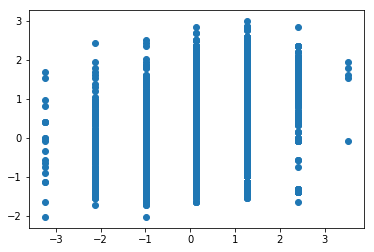

In [22]:
# plot quality v alcohol
plt.scatter(df_whitewine_scaled['quality'], df_whitewine_scaled['alcohol'])

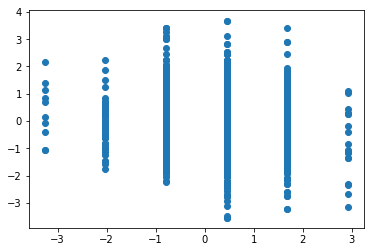

In [23]:
plt.scatter(df_redwine_scaled['quality'], df_redwine_scaled['density'])

In [28]:
df_whitewine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [32]:
# Assign X and y values for input to model for single variable linear regression
y = df_whitewine_scaled['quality']
#print(y)
X = df_whitewine_scaled.drop("quality", axis=1)


In [33]:
#split data into train and test sets
##  stratify=y:  A stratified sample is one that ensures that subgroups (strata) of a 
#given population are each adequately represented within the whole sample population of a research study.
##  test_size=0.2:  set 20% of dataset aside as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [34]:
## fit model with features in X
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
# Predicting the Test set results
y_pred = model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.32570166560265934


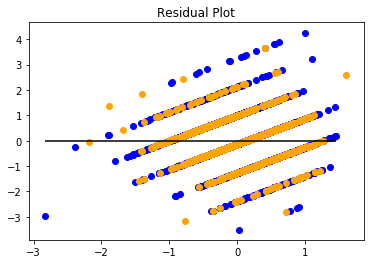

In [36]:
# plot residuals
predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show() 

In [37]:
#dataset['MinTemp'].values.reshape(-1,1)
y = df_whitewine_scaled['quality'].values
#X = df_redwine_scaled.drop('quality', axis=1)
X = df_whitewine_scaled[['alcohol', 'density']]

In [38]:
X.head()

,alcohol,density
0,-1.393152,2.331512
1,-0.824276,-0.009154
2,-0.336667,0.358665
3,-0.499203,0.525855
4,-0.499203,0.525855


In [39]:
#split data into train and test sets
##  stratify=y:  A stratified sample is one that ensures that subgroups (strata) of a 
#given population are each adequately represented within the whole sample population of a research study.
##  test_size=0.2:  set 20% of dataset aside as a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [40]:
## fit model with features in X
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
# Predicting the Test set results
y_pred = model.predict(X_test)
score=r2_score(y_test,y_pred)
print(f"R2 Score: {score}")

R2 Score: 0.22400811768670992


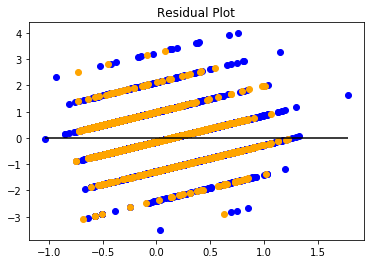

In [42]:
# plot residuals
predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train, c="blue", label="Training Data")
plt.scatter(y_pred, y_pred - y_test, c="orange", label="Testing Data")
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show() 